<a href="https://colab.research.google.com/github/jhan-04/practice_learning/blob/main/03_polynomial_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

공부 시간에 다른 시험 점수 (우등생)

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [30]:
from google.colab import files #파일 컴퓨터내에서 불러오기
myfile = files.upload()
#io와 pandas 모듈 import
import io #이후 주피터 노트북과는 다르게 pandas 모듈 외 io 모듈을 import 합니다(io 모듈 없이 pandas 모듈만 import할 경우, 오류 발생).
import pandas as pd
#pd.read_csv로 csv파일 불러오기
dataset = pd.read_csv(io.BytesIO(myfile['PolynomialRegressionData.csv'])) #파일명 입력
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

Saving PolynomialRegressionData.csv to PolynomialRegressionData (1).csv


In [31]:
#단순 선형 회귀(simple linear regression)
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x,y)

LinearRegression()

Text(0, 0.5, 'score')

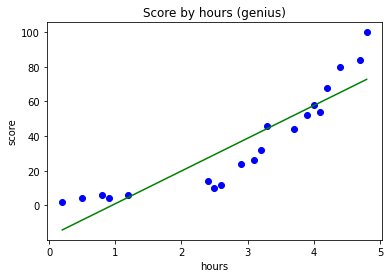

In [32]:
#데이터 시각화
plt.scatter(x,y,color='b')
plt.plot(x,reg.predict(x),color='g')
plt.title('Score by hours (genius)')
plt.xlabel('hours')
plt.ylabel('score')

In [33]:
reg.score(x,y) #전체 데이터를 통한 모델 평가

0.8169296513411765

In [34]:
#3-2. 다항 회귀 (polynomial regression)
from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree=4) #*차
x_poly=poly_reg.fit_transform(x) #[x] -> [x^0, x^1, x^2] ->x가 3이라면 [1,3,9]으로 변환
poly_reg.get_feature_names_out()

array(['1', 'x0', 'x0^2', 'x0^3', 'x0^4'], dtype=object)

Text(0, 0.5, 'score')

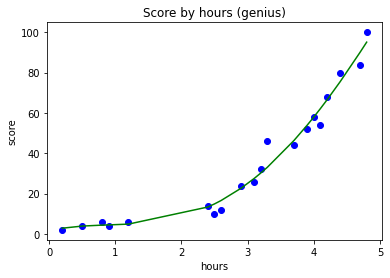

In [35]:
lin_reg=LinearRegression()
lin_reg.fit(x_poly,y)

plt.scatter(x,y,color='b')
plt.plot(x,lin_reg.predict(poly_reg.fit_transform(x)),color='g')
plt.title('Score by hours (genius)')
plt.xlabel('hours')
plt.ylabel('score')

Text(0, 0.5, 'score')

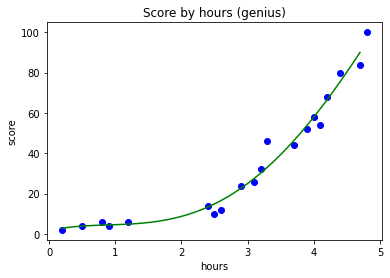

In [36]:
x_range=np.arange(min(x),max(x),0.1) #x최소값에서 x최대값까지의 범위를 0.1단위로 잘라서 데이터 생성
x_range=x_range.reshape(-1,1) #col을 1로 만들기, -1: row개수 자동으로 계산됨

plt.scatter(x,y,color='b')
plt.plot(x_range,lin_reg.predict(poly_reg.fit_transform(x_range)),color='g')
plt.title('Score by hours (genius)')
plt.xlabel('hours')
plt.ylabel('score')


In [40]:
#공부 시간에 따른 시험 성적 예측
reg.predict([[2]]) , lin_reg.predict(poly_reg.fit_transform([[2]]))#2시간 공부했을 때 예측 값 선형회귀 #다항회귀모델 예측

(array([19.85348988]), array([8.70559135]))

In [41]:
lin_reg.score(x_poly,y)

0.9782775579000045